Model Comparison for the merged data set scaled totals.


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [77]:
MM_df = pd.read_csv("../data/merged_data_sets/merged_data_scaled_totals.csv")
MM_df.head()

,State,Year,Maternal_Mortality_Rate,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999",...,UnknownInitialCare,NotReportedInitialCare,20-27Weeks,28-31Weeks,32-35Weeks,36Weeks,37-39Weeks,40Weeks,41Weeks,42PlusWeeks
0,Arizona,2011,17.535041,0.050941,0.120274,0.113698,0.039829,0.035108,0.109472,0.148437,...,0.000000,1.0,0.006383,0.007224,0.039992,0.039208,0.638813,0.211309,0.052395,0.003752
1,Arizona,2012,28.921461,0.049908,0.126118,0.108871,0.041107,0.036075,0.109403,0.148753,...,0.000000,1.0,0.005553,0.007959,0.040212,0.038061,0.641189,0.211300,0.051376,0.003135
2,Arizona,2013,26.869159,0.048638,0.124151,0.108188,0.044261,0.039363,0.107901,0.146377,...,0.000000,1.0,0.005105,0.007488,0.040070,0.037593,0.638633,0.211063,0.055923,0.003049
3,Arizona,2014,27.622084,0.048948,0.128419,0.100804,0.044806,0.044947,0.106101,0.144143,...,0.018725,0.0,0.005455,0.007642,0.039592,0.036899,0.637403,0.206245,0.062012,0.003338
4,Arizona,2015,23.432649,0.042673,0.131472,0.098472,0.050628,0.046791,0.103092,0.141929,...,0.019777,0.0,0.004874,0.007862,0.039707,0.037656,0.640590,0.203641,0.060890,0.003351


In [78]:
from sklearn.model_selection import train_test_split
MM_train, MM_test = train_test_split(MM_df,
                                            test_size=0.2,
                                            random_state=216,
                                            shuffle=True)
MM_tt, MM_val = train_test_split(MM_train,
                                 test_size = .2,
                                 random_state = 216,
                                 shuffle = True

)

In [79]:
features = ['$10,000 to $14,999', '$100,000 to $149,999', '$15,000 to $24,999', '$150,000 to $199,999',
       '$200,000 or more', '$25,000 to $34,999', '$35,000 to $49,999',
       '$50,000 to $74,999', '$75,000 to $99,999', 'Less than $10,000',
       'Percent_Overweight', 'Percent_Obese', 'Percent_Overweight_or_Obese',
       'Percent_No_Activity', 'ChronicHypertensionBirths',
       'DiabetesBirths', 'EnclampsiaBirths',
       'Pregnancy-AssociatedHypertensionBirths', 'TobaccoUseBirths',
       'HospitalBirths', 'ResidenceBirths', 'MD_Delivery', 'DO_Delivery',
       'CNM_Delivery', 'Other_Delivery_Attendant', 'Vaginal_Delivery',
       'Cesarean_Delivery', 'Married', 'Unmarried', 'NoPrenatalCare',
       '1stMonthInitialCare', '2ndMonthInitialCare', '3rdMonthInitialCare',
       '4thMonthInitialCare', '5thMonthInitialCare', '6thMonthInitialCare',
       '7thMonthInitialCare', '8thMonthInitialCare', '9thMonthInitialCare',
       'UnknownInitialCare', 'NotReportedInitialCare', '20-27Weeks',
       '28-31Weeks', '32-35Weeks', '36Weeks', '37-39Weeks', '40Weeks',
       '41Weeks', '42PlusWeeks']
target = 'Maternal_Mortality_Rate'

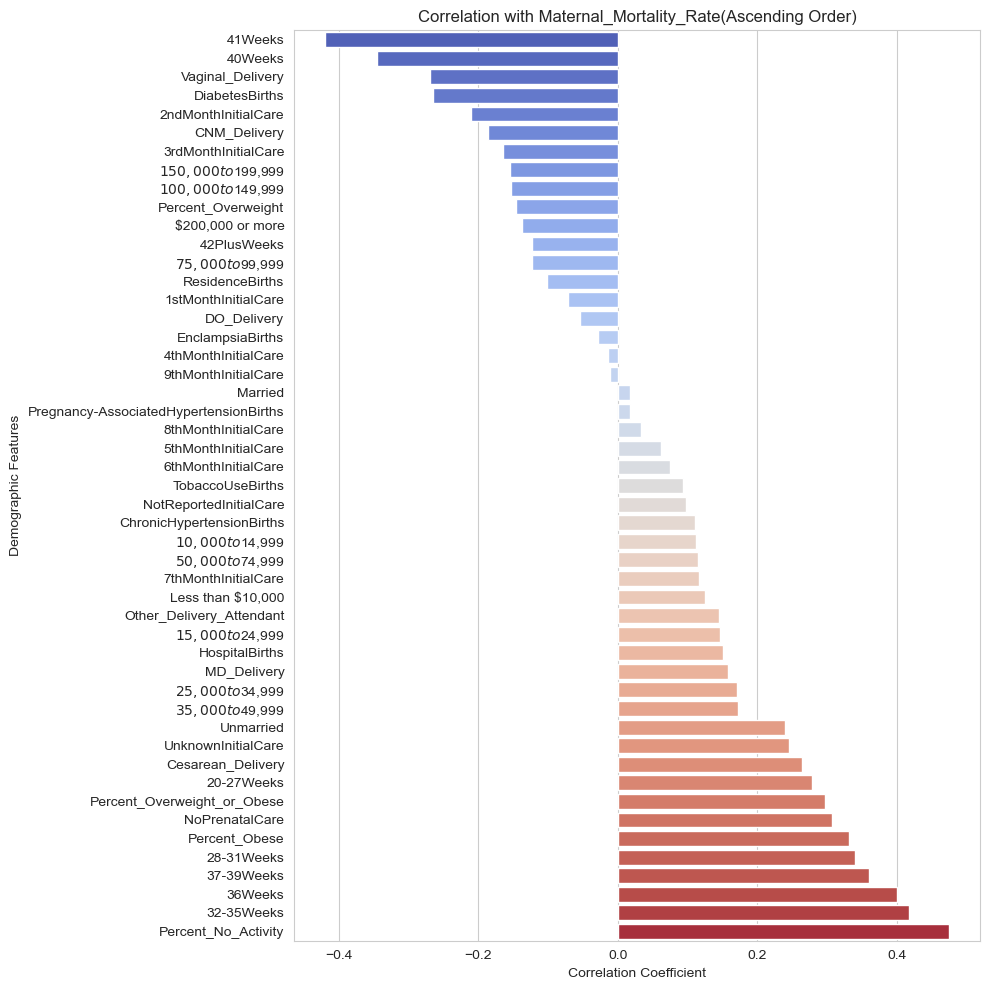

In [80]:
correlation_matrix = MM_train[features + [target]].corr()
# Extract the correlations with the target variable
target_correlation = correlation_matrix[target].drop(target)

# Make barplot
plt.figure(figsize=(10, 10))
sorted_correlations = target_correlation.sort_values() # Sort the target correlations in ascending order
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm', hue=target_correlation.index,legend=False)

plt.title('Correlation with ' + target + '(Ascending Order)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Demographic Features')

plt.tight_layout()
plt.show()

Model Selection

In [81]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import root_mean_squared_error

In [82]:
X_train = MM_train[features]
y_train = MM_train[target]
models = {
    'lr': LinearRegression(),
    'lasso': Lasso(alpha=0.01),
    'ridge': Ridge(),
    'svr': SVR(),
    'knr': KNeighborsRegressor(n_neighbors = 10),
    'rf': RandomForestRegressor(),
    'ab': AdaBoostRegressor(),
    'gbr': GradientBoostingRegressor(),
    'xgb': XGBRegressor()
}

In [83]:
rmses = {}
for name, model in models.items():
    model.fit(MM_tt[features],MM_tt[target])
    rmses[name] = root_mean_squared_error(MM_val[target], model.predict(MM_val[features]))

In [84]:
rmses

{'lr': 11.543516073010958,
 'lasso': 9.6003733589929,
 'ridge': 9.210616257236882,
 'svr': 11.445140723226993,
 'knr': 10.668734262895658,
 'rf': 8.613031322375665,
 'ab': 7.644798328227439,
 'gbr': 7.764191729356932,
 'xgb': 9.134520433517286}

Compare Gradient Boosting Regression (our best performing model) to a baseline model, where we just predict the mean value of the target variable.

In [88]:
from sklearn.model_selection import KFold

In [91]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
kfold = KFold(num_splits,
              random_state = 216,
              shuffle=True)

## This array will hold the mse for each model and split
rmses = np.zeros((2, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(MM_train):
    ## cv training set
    MM_tt = MM_train.iloc[train_index]
    
    ## cv holdout set
    MM_ho = MM_train.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = MM_tt[target].mean()*np.ones(len(MM_ho))
    
    rmses[0, i] = root_mean_squared_error(MM_ho[target], baseline_pred)
    
    ## Fit and get ho mse for slr model
    gbr = GradientBoostingRegressor()
    
    gbr.fit(MM_tt[features],MM_tt[target])
    
    rmses[1, i] = root_mean_squared_error(MM_ho[target], gbr.predict(MM_ho[features]))
    
    i = i + 1

In [92]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"Gradient Boosting Regressor Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")


Baseline Avg. CV RMSE: 12.54711546765656 and STD: 1.5474626131748932
Gradient Boosting Regressor Avg. CV RMSE: 8.813750628710732 and STD: 1.272978188439826


Gradient Boosting Regressor performed the best.

In [26]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_cv = GridSearchCV(GradientBoostingRegressor(), # first put the model object here
                          param_grid = {'max_depth':range(1, 11), # place the grid values for max_depth and
                                        'n_estimators':[100,500]}, # and n_estimators here
                          scoring = 'neg_root_mean_squared_error', # put the score we are trying to optimize here as a string, 'neg_root_mean_squared_error'
                                      # Note that "score" is the opposite of "loss":  bigger score is better.
                          cv = 5) # put the number of cv splits here

## you fit it just like a model
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [31]:
grid_cv.best_params_

{'max_depth': 3, 'n_estimators': 500}

In [32]:
grid_cv.best_estimator_.predict(X_train)

array([18.85343002, 12.59250703, 48.806632  , 54.71981612, 31.34916379,
       41.14779143, 36.80363579, 29.09909523, 30.72169961, 57.26604779,
       14.14669751, 29.94453073, 38.24551387, 30.68101606, 42.07518745,
       30.01664124, 35.26653251, 63.69442715, 23.44103279, 31.50397641,
       44.40379168, 41.52945424, 21.03379017, 74.57571745, 36.25219841,
       20.17712722, 22.34578755, 42.12587754, 56.13307627, 38.89654715,
       34.87907556, 23.93043851, 28.18195609, 39.85712753, 59.71994635,
       15.81326822, 37.83394306, 38.51741341, 25.84014991, 43.10048837,
       53.22337682,  9.14258166, 15.56287862, 23.09644448, 22.70930868,
       24.40225097, 28.32357755, 19.99028412, 23.4336969 , 17.08261069,
       23.85746839, 38.47708714, 22.01582008, 40.80136082, 33.09570787,
       16.10881556, 38.73438586, 34.55102183, 45.11426228, 27.99235498,
       25.36674708, 21.72825809, 27.40324878, 38.30169394, 43.24186935,
       34.45596848, 41.89809704, 20.04175591, 22.57234517, 12.36

In [33]:
feature_importance_df = pd.DataFrame({
    'Feature': features,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                                   Feature    Importance
0                       UnknownInitialCare  1.411022e-01
1                 Other_Delivery_Attendant  1.270239e-01
2                                  41Weeks  1.197064e-01
3                      Percent_No_Activity  9.700862e-02
4                           NoPrenatalCare  5.115223e-02
5                             CNM_Delivery  3.965984e-02
6                       $50,000 to $74,999  3.072072e-02
7                               32-35Weeks  2.685199e-02
8                           HospitalBirths  2.612885e-02
9              Percent_Overweight_or_Obese  2.173458e-02
10                              37-39Weeks  1.960225e-02
11               ChronicHypertensionBirths  1.952798e-02
12                      Percent_Overweight  1.896405e-02
13                              20-27Weeks  1.836607e-02
14                        Vaginal_Delivery  1.767930e-02
15                     3rdMonthInitialCare  1.535070e-02
16                             

In [69]:
GBR = GradientBoostingRegressor(max_depth=3, n_estimators=500)
GBR.fit(MM_tt[features],MM_tt[target])
RMSE = root_mean_squared_error(MM_val[target], model.predict(MM_val[features]))
RMSE

9.134520433517286

In [72]:
GBR_final = GradientBoostingRegressor(max_depth=3, n_estimators=500)
GBR_final.fit(MM_train[features],MM_train[target])
RMSE_final = root_mean_squared_error(MM_test[target], model.predict(MM_test[features]))
RMSE_final

8.502598290643745

In [73]:
feature_importance_final_df = pd.DataFrame({
    'Feature': features,  # List of feature names
    'Importance': GBR_final.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_final_df = feature_importance_final_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_final_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_final_df)

                                   Feature    Importance
0                       UnknownInitialCare  1.428941e-01
1                 Other_Delivery_Attendant  1.264026e-01
2                                  41Weeks  1.203750e-01
3                      Percent_No_Activity  1.008130e-01
4                           NoPrenatalCare  4.704265e-02
5                             CNM_Delivery  4.199295e-02
6                       $50,000 to $74,999  2.914715e-02
7                           HospitalBirths  2.630496e-02
8                               32-35Weeks  2.535876e-02
9                               37-39Weeks  2.128842e-02
10               ChronicHypertensionBirths  2.040083e-02
11                      Percent_Overweight  1.924831e-02
12                        Vaginal_Delivery  1.894749e-02
13             Percent_Overweight_or_Obese  1.759367e-02
14                              20-27Weeks  1.432469e-02
15  Pregnancy-AssociatedHypertensionBirths  1.418265e-02
16                     3rdMonth